# MATH 210 Introduction to Mathematical Computing

## October 30, 2019

* Solving systems of equations with Gaussian elimination
* Application: interpolation

In [1]:
import numpy as np
import scipy.linalg as la

We solve a system of equations $A \bf{x} = \bf{b}$ by forming the augmented matrix $[A \ \bf{b}]$ and reducing to row-echelon form using elementary row operations:

1. Scale row $i$ by scalar $k$.
2. Add $k$ times row $i$ to row $j$.
3. Switch rows $i$ and $j$.

This procedure is called [Gaussian elimination](https://en.wikipedia.org/wiki/Gaussian_elimination). Each of these row operations is the result of matrix multiplication $EA$ by an [elementary matrix $A$](https://en.wikipedia.org/wiki/Elementary_matrix).

Let's write a function called `scale_row` which does "scale row $i$ by scalar $k$".

In [2]:
def scale_row(A,k,i):
    M = A.shape[0]
    E = np.eye(M)
    E[i,i] = k
    return E@A

Test our function with a simple matrix $A$.

In [3]:
A = np.array([[1,2,3],[4,5,6]])
print(A)

[[1 2 3]
 [4 5 6]]


In [4]:
scale_row(A,3,1)

array([[ 1.,  2.,  3.],
       [12., 15., 18.]])

Let's write a function called `add_rows` which does "add $k$ times row $i$ to row $j$".

In [5]:
def add_rows(A,k,i,j):
    M = A.shape[0]
    E = np.eye(M)
    E[j,i] = k
    return E@A

In [6]:
add_rows(A,3,0,1)

array([[ 1.,  2.,  3.],
       [ 7., 11., 15.]])

Let's write a function called `switch_rows` which does "switch row $i$ and $j$".

In [7]:
def switch_rows(A,i,j):
    M = A.shape[0]
    E = np.eye(M)
    E[i,i] = 0
    E[j,j] = 0
    E[i,j] = 1
    E[j,i] = 1
    return E@A

In [8]:
switch_rows(A,0,1)

array([[4., 5., 6.],
       [1., 2., 3.]])

Let's use Gaussian elimination with these functions to solve

$$
x_0 + 2x_1 = 3 \\
4x_0 + 5x_1 = 6
$$

In [9]:
A1 = add_rows(A,-4,0,1)
print(A1)

[[ 1.  2.  3.]
 [ 0. -3. -6.]]


In [10]:
A2 = scale_row(A1,-1/3,1)
print(A2)

[[1. 2. 3.]
 [0. 1. 2.]]


In [11]:
A3 = add_rows(A2,-2,1,0)
print(A3)

[[ 1.  0. -1.]
 [ 0.  1.  2.]]


In [12]:
np.array([[1,2],[4,5]]) @ np.array([[-1],[2]])

array([[3],
       [6]])

## Interpolation

Let's find the unique polynomial of degree 2 which passes through the points $(0,2), (1,-1), (2,0)$.

Let $p(x) = a_0 + a_1x + a_2x^2$. We need to solve for $a_0,a_1,a_2$ such that

$$
a_0 = 2 \\
a_0 + a_1 + a_2 = -1 \\
a_0 + 2a_1 + 4a_2 = 0
$$

In [13]:
A = np.array([[1,0,0,2],[1,1,1,-1],[1,2,4,0]])
print(A)

[[ 1  0  0  2]
 [ 1  1  1 -1]
 [ 1  2  4  0]]


In [14]:
A1 = add_rows(A,-1,0,1)
print(A1)

[[ 1.  0.  0.  2.]
 [ 0.  1.  1. -3.]
 [ 1.  2.  4.  0.]]


In [15]:
A2 = add_rows(A1,-1,0,2)
print(A2)

[[ 1.  0.  0.  2.]
 [ 0.  1.  1. -3.]
 [ 0.  2.  4. -2.]]


In [16]:
A3 = add_rows(A2,-2,1,2)
print(A3)

[[ 1.  0.  0.  2.]
 [ 0.  1.  1. -3.]
 [ 0.  0.  2.  4.]]


In [17]:
A4 = scale_row(A3,1/2,2)
print(A4)

[[ 1.  0.  0.  2.]
 [ 0.  1.  1. -3.]
 [ 0.  0.  1.  2.]]


In [18]:
A5 = add_rows(A4,-1,2,1)
print(A5)

[[ 1.  0.  0.  2.]
 [ 0.  1.  0. -5.]
 [ 0.  0.  1.  2.]]


In [19]:
import matplotlib.pyplot as plt

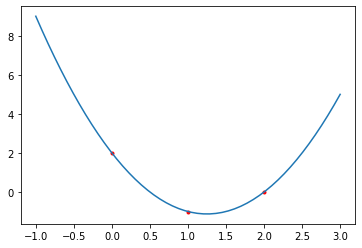

In [20]:
x = np.array([0,1,2])
y = np.array([2,-1,0])
xs = np.linspace(-1,3,50)
ys = 2 - 5*xs + 2*xs**2
plt.plot(x,y,'r.')
plt.plot(xs,ys)